In [8]:
import os 
os.chdir('/media/shubham/3AA25FBFA25F7DF7/AV/blogs/imagepreprocessing/car')
from skimage import io, color, filters, restoration, feature, transform
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os as os
#os.chdir('E:\\AV\\blogs\\regression')
#os.chdir('/media/shubham/3AA25FBFA25F7DF7/AV/blogs/image preprocessing')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

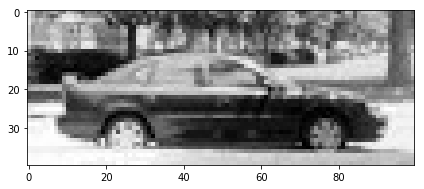

In [4]:
img = io.imread('pos-499-10.jpg')
io.imshow(img)

In [141]:
np.mean(img)
img1 = img/256

##### rescaling and cropping to 32x32
input_width = 150
input_height = 150
#print ("original image width: " + str(img.shape[1]) + " Original image height: " + str(img.shape[0]))
aspect = img.shape[1]/float(img.shape[0])
#print ("Aspect ratio: " + str(aspect))
#print ("since aspect ratio is greater than 1, we will rescale it into a landscape orientation")
res = int(aspect * input_height)
imgScaled = transform.resize(img, (input_width,res))
#io.imshow(imgScaled)
#print("new image shape: " + str(imgScaled.shape))

In [ ]:
# cropping
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

# Scaled image
img2 = imgScaledCenter = crop_center(imgScaled,150,150)
io.imshow(imgScaledCenter)

img3 = transform.resize(img2,(64,64))
io.imshow(img3)

In [110]:
## grayscale
from skimage.color import rgb2gray
img_noisy = rgb2gray(img)

In [113]:
#img1=img_noisy/255

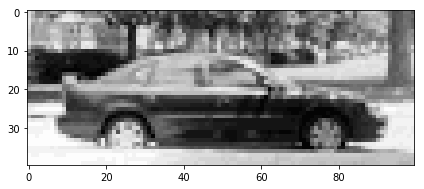

In [142]:
io.imshow(img1)

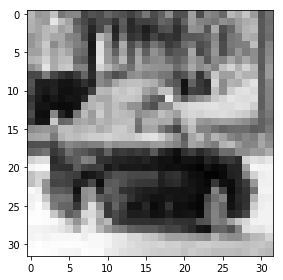

In [7]:
import cv2
img2 = cv2.resize(img,(32,32))
io.imshow(img2)

In [154]:
img2 = img2[5:-5,5:-5]

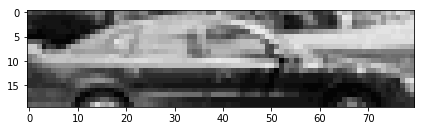

In [155]:
io.imshow(img2)

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:22: skimage_deprecation: Function ``gaussian_filter`` is deprecated. Use ``skimage.filters.gaussian`` instead.
  multichannel=None, preserve_range=False, truncate=4.0):


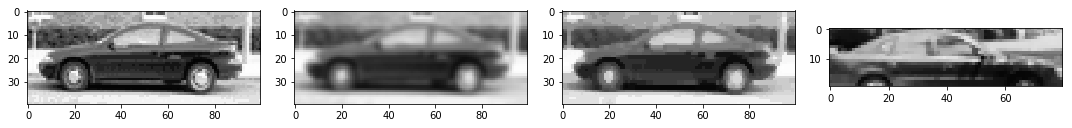

In [156]:
## denoising
figure = plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
io.imshow(img_noisy)
plt.subplot(1,4,2)
gaussian_img_noisy = filters.gaussian_filter(img_noisy, sigma=1)
io.imshow(gaussian_img_noisy)
plt.subplot(1,4,3)
median_img = filters.rank.median(img_noisy)
io.imshow(median_img)
plt.subplot(1,4,4)
tv_img = restoration.denoise_tv_chambolle(img2,weight=0.01)
io.imshow(tv_img)

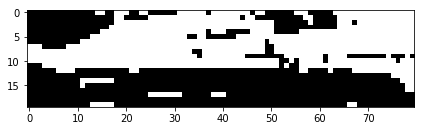

In [157]:
val = filters.threshold_otsu(img2)
mask1 = img2 > val # for front part
io.imshow(mask1)

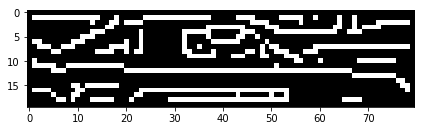

In [158]:
image = mask1
pipeline = (feature.canny(restoration.denoise_tv_chambolle(tv_img, weight=0.01)))
io.imshow(pipeline,cmap = plt.cm.gray)

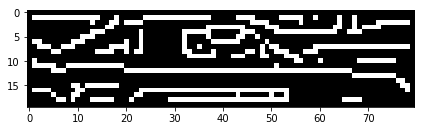

In [159]:
io.imshow(pipeline)

In [124]:
#cv2.resize(rgb2gray(cv2.imread('cat.0.jpg')),(32,32)).flatten().shape

In [123]:
pipeline.shape

(40, 100)

In [9]:
def image_preprocessing(img):
	## rescaling to 32x32
	input_width = 150
	input_height = 150
	#print ("original image width: " + str(img.shape[1]) + " Original image height: " + str(img.shape[0]))
	aspect = img.shape[1]/float(img.shape[0])
	#print ("Aspect ratio: " + str(aspect))
	#print ("since aspect ratio is greater than 1, we will rescale it into a landscape orientation")
	res = int(aspect * input_height)
	imgScaled = transform.resize(img, (input_width,res))
	# cropping
	# Scaled image
	img2 = imgScaledCenter = crop_center(imgScaled,150,150)
	img3 = transform.resize(img2,(64,64))
	img_noisy = rgb2gray(img3)
	tv_img = restoration.denoise_tv_chambolle(img_noisy,weight=0.01)
	val = filters.threshold_otsu(tv_img)
	mask1 = tv_img > val # for front part
	image = mask1
	pipeline = (feature.canny(restoration.denoise_tv_chambolle(image, weight=1)))
	return pipeline

In [83]:
img = image_preprocessing(io.imread('cat.1.jpg'))

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [66]:
import cv2

In [87]:
img = img.astype('int')

In [91]:
img1= img.flatten()

In [72]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [74]:
img1 = image_to_feature_vector(io.imread('cat.1.jpg'))

In [75]:
img1

array([33, 37, 41, ..., 51, 36, 31], dtype=uint8)

In [80]:
def image_preprocessing(img):
    ## rescaling to 32x32
    input_width = 150
    input_height = 150
    #print ("original image width: " + str(img.shape[1]) + " Original image height: " + str(img.shape[0]))
    aspect = img.shape[1]/float(img.shape[0])
    #print ("Aspect ratio: " + str(aspect))
    #print ("since aspect ratio is greater than 1, we will rescale it into a landscape orientation")
    res = int(aspect * input_height)
    imgScaled = transform.resize(img, (input_width,res))
    # cropping
    # Scaled image
    img2 = imgScaledCenter = crop_center(imgScaled,200,200)
    #img3 = transform.resize(img2,(64,64))
    img_noisy = rgb2gray(img2)
    tv_img = restoration.denoise_tv_chambolle(img_noisy,weight=0.01)
    val = filters.threshold_otsu(tv_img)
    mask1 = np.where(tv_img > val,tv_img,0) # for front part
    image = mask1
    pipeline = (feature.canny(restoration.denoise_tv_chambolle(image, weight=0.01)))
    img1 = pipeline.astype('int')

    return img1.flatten()

In [85]:
img = image_preprocessing(io.imread('cat.5.jpg'))

/home/shubham/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [87]:
img

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
len(img)

225

In [8]:
def crop_center(img,cropx,cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

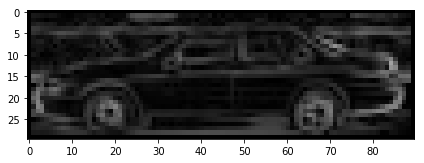

In [9]:
img = io.imread('pos-499-0.jpg')
img = img[5:-5,5:-5]
tv_img = restoration.denoise_tv_chambolle(img,weight=0.01)
val = filters.threshold_otsu(tv_img)
#mask1 = tv_img > val
#img1 = rgb2gray(mask1)
edges = filters.sobel(tv_img)
io.imshow(edges)

In [15]:
edges

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.09979932,  0.09270031, ...,  0.07848606,
         0.0575878 ,  0.        ],
       [ 0.        ,  0.06127999,  0.03997336, ...,  0.02943949,
         0.00559097,  0.        ],
       ..., 
       [ 0.        ,  0.13354762,  0.14918237, ...,  0.0383012 ,
         0.02320151,  0.        ],
       [ 0.        ,  0.1048498 ,  0.10555953, ...,  0.02720013,
         0.0122347 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 100

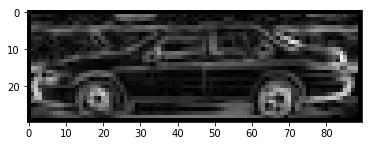

In [23]:
im = plt.imshow(edges, interpolation='nearest', cmap='gray')

In [19]:
def image_preprocessing1(img):
    ## rescaling to 32x32
    #input_width = 150
    #input_height = 150
    #print ("original image width: " + str(img.shape[1]) + " Original image height: " + str(img.shape[0]))
    #aspect = img.shape[1]/float(img.shape[0])
    #print ("Aspect ratio: " + str(aspect))
    #print ("since aspect ratio is greater than 1, we will rescale it into a landscape orientation")
    #res = int(aspect * input_height)
    #imgScaled = transform.resize(img, (input_width,res))
    # cropping
    # Scaled image
    #img2 = imgScaledCenter = crop_center(imgScaled,150,150)
    from skimage.color import rgb2gray
    img2 = rgb2gray(img)
    #img3 = transform.resize(img2,(64,64))
    #img = cv2.resize(image, (32,32))
    #img_noisy = img_noisy[5:-5,5:-5]
    img2 = restoration.denoise_tv_chambolle(img2,weight=0.01)
    img1 = filters.sobel(img2)
    return img1

In [17]:
img = io.imread('pos-499-0.jpg')

In [20]:
img2 = image_preprocessing1(img)

In [21]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

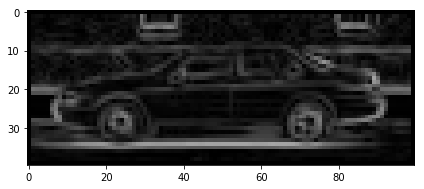

In [22]:
io.imshow(img2)

In [172]:
img2

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.24846   ,  0.14002213, ...,  0.02350865,
         0.03348743,  0.        ],
       [ 0.        ,  0.27973515,  0.14650433, ...,  0.06044348,
         0.05705787,  0.        ],
       ..., 
       [ 0.        ,  0.01612216,  0.02445651, ...,  0.0044212 ,
         0.01365588,  0.        ],
       [ 0.        ,  0.03679423,  0.02767834, ...,  0.00239197,
         0.01537363,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])